# Part 2: Regression

In [137]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.feature_selection import RFECV, RFE

import math
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, accuracy_score, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV

Upload the Clean_File.csv from Part 1.

In [138]:
#Load the cleaned Data file from Part 1
df_new = pd.read_csv("clean_File.csv")
df_new.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1243.0,NaN,NaN,NaN,625.148833,362.595894,0.0,310.5,625.0,939.5,1252.0
Age,1243.0,NaN,NaN,NaN,32.489139,5.583692,21.0,29.0,32.0,35.0,69.0
Gender,1243,3,Male,1045,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,1243,2,From_Germany,1100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Position,1243,5,Software Engineer/Developer,870,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_yrs_Exp,1243.0,NaN,NaN,NaN,9.044608,11.823958,0.0,5.0,8.0,12.0,383.0
German_Exp,1243.0,NaN,NaN,NaN,3.69469,3.561588,0.0,1.25,3.0,5.0,30.0
Seniority_level,1243,4,Senior,785,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Main_Backgrnd,1243,4,Other,720,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Other_Backgrnd,1243,10,Other,896,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
df_new.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
df_new.columns

Index(['Age', 'Gender', 'City', 'Position', 'Total_yrs_Exp', 'German_Exp',
       'Seniority_level', 'Main_Backgrnd', 'Other_Backgrnd', 'Vac_days',
       'Empl_Status', 'Contract_duration', 'Main_Work_Lang', 'Company_size',
       'Company_type', 'Target'],
      dtype='object')

In [140]:
# Convert Object columns to Categorical Columns
for col in (df_new.select_dtypes(exclude=[np.number]).columns):
    df_new[col]=df_new[col].astype('category')

    
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                1243 non-null   float64 
 1   Gender             1243 non-null   category
 2   City               1243 non-null   category
 3   Position           1243 non-null   category
 4   Total_yrs_Exp      1243 non-null   float64 
 5   German_Exp         1243 non-null   float64 
 6   Seniority_level    1243 non-null   category
 7   Main_Backgrnd      1243 non-null   category
 8   Other_Backgrnd     1243 non-null   category
 9   Vac_days           1243 non-null   float64 
 10  Empl_Status        1243 non-null   category
 11  Contract_duration  1243 non-null   category
 12  Main_Work_Lang     1243 non-null   category
 13  Company_size       1243 non-null   category
 14  Company_type       1243 non-null   category
 15  Target             1243 non-null   float64 
dtypes: cat

For Practice and fun of PYTHON: Best Regression to use?

In [141]:
# Building on the Classification Function (DTorFR) from my Assignemnt 1 and converting it into Regression and adding more regressors:

# Create a Function to find the best Regression model for our dataframe
# Regressors used are:
# DecisionTree Regressor()
# Random Forest Regressor()
# Linear Regression
# SupportVectorMachine:SVM()
# Lasso()
# Ridge()
# ElasticNet()


def Best_Regression_Model(data, target, n_trials):

    X = data.drop(columns={target})
    y = data[target]

    #X = (df.drop(columns={target})).values
    print('X Shape:',X.shape)
    #y = (df[target]).values
    print('Y Shape:',y.shape)

    # Split data between
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

    # Initialize Pipeline to transform Dataframe

        # Numerical Columns
    numeric_features = X_train.select_dtypes(include=[np.number]).columns # Using X_train, so does not include Target column
    #numeric_transformer = StandardScaler()
    numeric_transformer = MinMaxScaler()
    # The MinMaxscaler is a type of scaler that scales the minimum and maximum values to be 0 and 1 respectively. 
    # While the StandardScaler scales all values between min and max so that they fall within a range from min to max
    # I hav decided to use the StandardScaler() for our case.

        # Categorical
    categorical_features = X_train.select_dtypes(exclude=[np.number]).columns
    categorical_transformer = OneHotEncoder(handle_unknown='ignore') # fix for getting Value error

        # Preprocessor
    preprocessor = ColumnTransformer(transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)])
    
        # Create Pipeline
    pipeline=Pipeline([('preprocessor', preprocessor)])

            # fit pipeline to the training data
    pipeline.fit(X_train)

        # transform the train and test data
    X_train_transformed = pipeline.transform(X_train)
    X_test_transformed = pipeline.transform(X_test)



    # create lists to compile & capture the accuracies for each tree
    dt_accuracies = [] 
    rf_accuracies = []
    lr_accuracies=[]
    svm_accuracies=[]
    lss_accuracies=[]
    ridge_accuracies=[]
    el_accuracies=[]

       
    for i in range(n_trials):
        # Decision Tree Regressor
        dt=DecisionTreeRegressor() # randon_state=0 to keep the same results
        dt.fit(X_train_transformed, y_train)
        dt_pred=dt.predict(X_test_transformed)
        dt_acc=mean_squared_error(y_test, dt_pred)
        dt_accuracies.append(dt_acc)

        # Random Forest Regressor
        rf = RandomForestRegressor()
        rf.fit(X_train_transformed, y_train)
        rf_pred = rf.predict(X_test_transformed)
        rf_acc = mean_squared_error(y_test, rf_pred)
        rf_accuracies.append(rf_acc)

        # Linea Regression
        lr=LinearRegression()
        lr.fit(X_train_transformed, y_train)
        lr_pred = lr.predict(X_test_transformed)
        lr_acc = mean_squared_error(y_test, lr_pred)
        lr_accuracies.append(lr_acc)

        # SVM
        svm=SVR()
        svm.fit(X_train_transformed, y_train)
        svm_pred = svm.predict(X_test_transformed)
        svm_acc = mean_squared_error(y_test, svm_pred)
        svm_accuracies.append(svm_acc)     

        # Lasso
        lss=Lasso(max_iter=10000)
        lss.fit(X_train_transformed, y_train)
        lss_pred = lss.predict(X_test_transformed)
        lss_acc = mean_squared_error(y_test, lss_pred)
        lss_accuracies.append(lss_acc)

        # Ridge
        ridge=Ridge(max_iter=10000)
        ridge.fit(X_train_transformed, y_train)
        ridge_pred = ridge.predict(X_test_transformed)
        ridge_acc = mean_squared_error(y_test, ridge_pred)
        ridge_accuracies.append(ridge_acc)

        # ElasticNet
        elastic=ElasticNet(max_iter=10000)
        elastic.fit(X_train_transformed, y_train)
        elastic_pred = elastic.predict(X_test_transformed)
        elastic_acc = mean_squared_error(y_test, elastic_pred)
        el_accuracies.append(elastic_acc)
 
 
    # print the mean accuracy for each model
    # Calculating the mean of the all accuracies from trails.
    print(f"At default settings, Decision Tree AVG RMSE after {n_trials} runs: ", round(math.sqrt(np.mean(dt_accuracies)), 3)) 
    print(f"At default settings, Random Forest RMSE after {n_trials} runs: ", round(math.sqrt(np.mean(rf_accuracies)), 3))
    print(f"At default settings, Linear Regression AVG RMSE after {n_trials} runs: ", round(math.sqrt(np.mean(lr_accuracies)), 3))
    print(f"At default settings, SVM AVG RMSE after {n_trials} runs: ", round(math.sqrt(np.mean(svm_accuracies)), 3))
    print(f"At default settings, Lasso AVG RMSE after {n_trials} runs: ", round(math.sqrt(np.mean(lss_accuracies)), 3))
    print(f"At default settings, Ridge AVG RMSE after {n_trials} runs: ", round(math.sqrt(np.mean(ridge_accuracies)), 3))
    print(f"At default settings, ElasticNet AVG RMSE after {n_trials} runs: ", round(math.sqrt(np.mean(el_accuracies)), 3))

    dict={'Decision Tree Regressor': round(math.sqrt(np.mean(dt_accuracies)), 3), 'Random Forest Regressor': round(math.sqrt(np.mean(rf_accuracies)), 3),
                    'Linear Regression': round(math.sqrt(np.mean(lr_accuracies)), 3),'Support Vector Machine':round(math.sqrt(np.mean(svm_accuracies)), 3),
                    'Lasso': round(math.sqrt(np.mean(lss_accuracies)), 3),'Ridge': round(math.sqrt(np.mean(ridge_accuracies)), 3),
                    'ElasticNet': round(math.sqrt(np.mean(el_accuracies)), 3)}
   

    print()
    print("The Lesser the RMSE the BETTER the model")
    print()
    print('Best Model with the lesser RMSE Score is: ', min(dict.items(), key=lambda x: x[1]))
    
    return

In [33]:
# My Result

# Best_Regression_Model(df_new, 'Target', 5) #using MinMaxScaler()

X Shape: (1243, 15)
Y Shape: (1243,)
At default settings, Decision Tree AVG RMSE after 5 runs:  52724.837
At default settings, Random Forest RMSE after 5 runs:  40497.289
At default settings, Linear Regression AVG RMSE after 5 runs:  36557.769
At default settings, SVM AVG RMSE after 5 runs:  40915.865
At default settings, Lasso AVG RMSE after 5 runs:  36786.162
At default settings, Ridge AVG RMSE after 5 runs:  36577.674
At default settings, ElasticNet AVG RMSE after 5 runs:  36582.387

The Lesser the RMSE the BETTER the model

Best Model with the lesser RMSE Score is:  ('Linear Regression', 36557.769)


In [ ]:
# For Akeem
Best_Regression_Model(df_new, 'Target', 5)

## Feature Selection using the most popular method called RFE (Recursive Feature Elimination) but with CV( Cross-Validation): RFECV

RFE is popular because it is easy to configure and use and because it is effective at selecting those features (columns) in a training dataset that are more or most relevant in predicting the target variable.
https://machinelearningmastery.com/rfe-feature-selection-in-python/

We will use the most popular method, Random Forest Regression or Random Forest Classification as the model for Feature Selection.
However, to get the best deal, we would need to find the best (hyper)Parameters for the model via GridsearchCV.

Lets take a quick look at the feature importance chart using the RandomForest Regressor

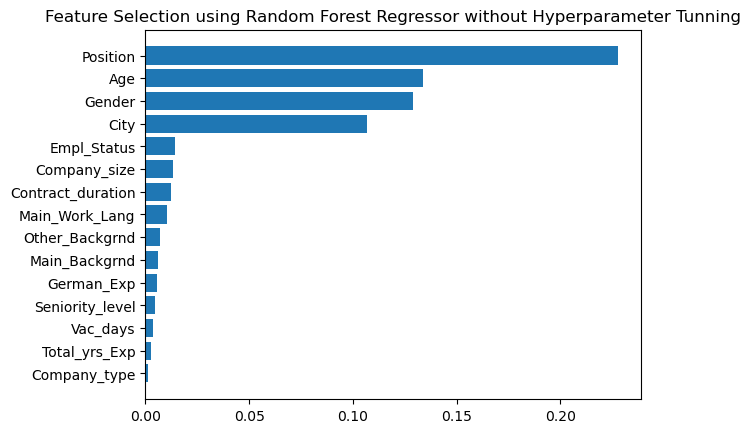

In [159]:
y = ((df_new['Target']))
X = df_new.drop(columns={'Target'})

X_train, X_test, y_train, y_test = train_test_split(X,y)

#view transformed values
#print(y_transformed)

        # Numerical Columns
numeric_features = ['Age', 'Total_yrs_Exp', 'German_Exp', 'Vac_days'] # Using X_train, so does not include Target column
numeric_transformer = StandardScaler()
    # The MinMaxscaler is a type of scaler that scales the minimum and maximum values to be 0 and 1 respectively. 
    # While the StandardScaler scales all values between min and max so that they fall within a range from min to max
    # I hav decided to use the StandardScaler() for our case.

    # Categorical
categorical_features = ['Gender', 'City', 'Position', 'Seniority_level', 'Main_Backgrnd',
       'Other_Backgrnd', 'Empl_Status', 'Contract_duration', 'Main_Work_Lang',
       'Company_size', 'Company_type']
categorical_transformer = OneHotEncoder()

    # Preprocessor
preprocessor = ColumnTransformer(transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)])

# From: https://www.yourdatateacher.com/2021/10/11/feature-selection-with-random-forest/#:~:text=Feature%20selection%20in%20Python%20using%20Random%20Forest&text=Let's%20first%20import%20all%20the,matplotlib%20for%20visualizing%20our%20results.&text=First%2C%20let's%20load%20our%20dataset.&text=Now%20we%20can%20split%20it%20into%20training%20and%20test.

rf = RandomForestRegressor(n_jobs=-1)
pipeline2=Pipeline([('preprocessor', preprocessor), ('fs', rf)])

pipeline2.fit(X,y)

f_i = list(zip(X.columns,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])
plt.title('Feature Selection using Random Forest Regressor without Hyperparameter Tunning')

plt.show()

In [142]:
# Random Forest grinsearchCV to get the optimum hyperparameters.
# This function is only for Random Forest Regression
def RF_gridSEARCH(data, target):

    X = data.drop(columns={target})
    y = data[target]

    # Split data between
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

    # Initialize Pipeline to transform Dataframe

        # Numerical Columns
    numeric_features = X_train.select_dtypes(include=[np.number]).columns # Using X_train, so does not include Target column
    #numeric_transformer = StandardScaler()
    numeric_transformer = MinMaxScaler()
    # The MinMaxscaler is a type of scaler that scales the minimum and maximum values to be 0 and 1 respectively. 
    # While the StandardScaler scales all values between min and max so that they fall within a range from min to max
    # I hav decided to use the StandardScaler() for our case.

        # Categorical
    categorical_features = X_train.select_dtypes(exclude=[np.number]).columns
    categorical_transformer = OneHotEncoder(handle_unknown='ignore') # fix for value error from unknow=handle_unknown='ignore'

        # Preprocessor
    preprocessor = ColumnTransformer(transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)])

    # Model used:
    model=RandomForestRegressor(n_jobs=-1)

    # Initiate/construct Pipeline
    pipeline=Pipeline([('preprocessor', preprocessor), ('rf', model)])

    # specify the hyperparameters to tune
    rf_grid = {'rf__n_estimators': [90,100, 200, 250],
                'rf__max_depth': [5, 6],
                    'rf__min_samples_split': [3, 4, 5],
                        'rf__max_samples': [0.05,0.055,0.1, 0.12]}

    # Create gridsearchcv object with pipeline
    # scoring='r2' if using using Regression.
    # scoring='accuracy' if using classification
    #cv=10 Cross-validation set at 7
    grid = GridSearchCV(pipeline, param_grid=rf_grid, scoring='r2', cv=5) 

    # fit grid to the training data
    grid.fit(X_train, y_train)

    # display the best_params_ and best_score_
    print("Best parameters: ", grid.best_params_)
    print("Best R2 Score: ", np.abs(grid.best_score_))
    return grid.best_params_

In [41]:
# Test 1 using:
    #rf_grid = {'rf__n_estimators': [1, 50, 75, 80, 100, 200, 250, 300],
                #'rf__max_depth': [3, 4, 5, 6],
                    #'rf__min_samples_split': [2, 4, 6, 8],
                        #'rf__max_samples': [0.2,.3, .4, .5, .6, .7]}
                        
#RF_gridSEARCH(df_new, 'Target') 

Best parameters:  {'rf__max_depth': 6, 'rf__max_samples': 0.3, 'rf__min_samples_split': 8, 'rf__n_estimators': 75}
Best R2 Score:  0.1260590374631748


{'rf__max_depth': 6,
 'rf__max_samples': 0.3,
 'rf__min_samples_split': 8,
 'rf__n_estimators': 75}

In [44]:
#Test 2 using: 
    #rf_grid = {'rf__n_estimators': [80, 100, 200],
                #'rf__max_depth': [3, 4, 5],
                    #'rf__min_samples_split': [2,3, 4, 5, 6],
                        #'rf__max_samples': [0.1, 0.15, 0.2, 0.25]}
                        
#RF_gridSEARCH(df_new, 'Target') 


Best parameters:  {'rf__max_depth': 5, 'rf__max_samples': 0.1, 'rf__min_samples_split': 5, 'rf__n_estimators': 80}
Best R2 Score:  0.11276146784684875


{'rf__max_depth': 5,
 'rf__max_samples': 0.1,
 'rf__min_samples_split': 5,
 'rf__n_estimators': 80}

In [46]:
# Test 3 using: 
    #rf_grid = {'rf__n_estimators': [90,100, 200, 250],
                #'rf__max_depth': [5, 6],
                    #'rf__min_samples_split': [3, 4, 5],
                        #'rf__max_samples': [0.05,0.055,0.1, 0.12]}
# RF_gridSEARCH(df_new, 'Target')

Best parameters:  {'rf__max_depth': 6, 'rf__max_samples': 0.12, 'rf__min_samples_split': 4, 'rf__n_estimators': 250}
Best R2 Score:  0.11545497359632136


{'rf__max_depth': 6,
 'rf__max_samples': 0.12,
 'rf__min_samples_split': 4,
 'rf__n_estimators': 250}

We will use the parameters from Test 1 above for RandomForest Regression for Feature Selection. It had the highest r2 score...

In [ ]:
# For Akeem

RF_gridSEARCH(df_new, 'Target')

Now lets do a quick GridsearchCV on our prefered Model, Linear Regression.

In [143]:
# Linear Regression grinsearchCV to get the optimum hyperparameters.
# This function is only for Linear Regression()
def LR_gridSEARCH(data, target):

    X = data.drop(columns={target})
    y = data[target]

    # Split data between
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

    # Initialize Pipeline to transform Dataframe

        # Numerical Columns
    numeric_features = X_train.select_dtypes(include=[np.number]).columns # Using X_train, so does not include Target column
    #numeric_transformer = StandardScaler()
    numeric_transformer = MinMaxScaler()
    # The MinMaxscaler is a type of scaler that scales the minimum and maximum values to be 0 and 1 respectively. 
    # While the StandardScaler scales all values between min and max so that they fall within a range from min to max
    # I hav decided to use the StandardScaler() for our case.

        # Categorical
    categorical_features = X_train.select_dtypes(exclude=[np.number]).columns
    categorical_transformer = OneHotEncoder(handle_unknown='ignore') # fix for value error from unknow=handle_unknown='ignore'

        # Preprocessor
    preprocessor = ColumnTransformer(transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)])

    # Model used:
    model=LinearRegression()

    # Initiate/construct Pipeline
    pipeline=Pipeline([('preprocessor', preprocessor), ('lr', model)])

    # specify the hyperparameters to tune

    lr_grid = {'lr__fit_intercept': [True, False],
              'lr__copy_X': [True, False],
              'lr__n_jobs': [-1, None]}

    # Create gridsearchcv object with pipeline
    # scoring='r2' if using using Regression.
    # scoring='accuracy' if using classification
    #cv=10 Cross-validation set at 7
    grid = GridSearchCV(pipeline, param_grid=lr_grid, scoring='r2', cv=5) 

    # fit grid to the training data
    grid.fit(X_train, y_train)

    # display the best_params_ and best_score_
    print("Best parameters: ", grid.best_params_)
    print("Best R2 Score: ", np.abs(grid.best_score_))

    return grid.best_params_

In [62]:
# My results

# LR_gridSEARCH(df_new, 'Target')

Best parameters:  {'lr__copy_X': True, 'lr__fit_intercept': False, 'lr__n_jobs': -1}
Best R2 Score:  0.10307762766514181


{'lr__copy_X': True, 'lr__fit_intercept': False, 'lr__n_jobs': -1}

In [ ]:
# For Akeem

LR_gridSEARCH(df_new, 'Target')

I ran the above code a few more times, to perfect the hyperparameters until i can no longer improve on the r2 score. For now we will use this just once.

Implement the Best parameters into our RFECV code below. For the code below, we will be using the following:
<li> RandomForestRegression() for feature selection, and
<li> LinearRegression() as our model for predicitons.
<li> The function is build to also test out ElasticNet(), Lasso() and Ridge().
<li> Lasso, Ridge, ElasticNet set at max_iteration =10,000 because i was getting errors at the default 1000 iterations


RFECV makes it possible for the feature selection process to automatically select the number of features chosen by the RFE class.
<il>This is acheived by performing cross-validation evaluation of different numbers of features and automatically selecting the number of features that resukted in the best mean score of RFE,

In [152]:
def RFECV_RF(data, target, model_name):
    X = data.drop(columns={target})
    y = data[target]
    print(X.shape, y.shape)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

    # Initialize Pipeline to transform Dataframe
    numeric_features = X_train.select_dtypes(include=[np.number]).columns
    numeric_transformer = MinMaxScaler()

    categorical_features = X_train.select_dtypes(exclude=[np.number]).columns
    categorical_transformer = OneHotEncoder()

    preprocessor = ColumnTransformer(transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)])

    feat_model = RandomForestRegressor(max_depth=6, max_samples=0.3, min_samples_split=8, n_estimators=75, n_jobs=-1) # the optimum parameters from the RF_Gridsearch function

    if model_name == 'ElasticNet':
        model = ElasticNet(max_iter=10000) #Elesticnet regression is  a linear regression combined with L1 (Lasso), L2 (Ridge) priors as regulerizers
    elif model_name == 'Lasso':
        model = Lasso(max_iter=10000) #L1 Regularization, also called a Lasso regression, adds the “absolute value of magnitude” of the coefficient as a penalty term to the loss function. 
    elif model_name == 'Ridge':
        model = Ridge(max_iter=10000) # L2 Regularization, also called a Ridge regression, adds the “squared magnitude” of the coefficient as the penalty term to the loss function.
    elif model_name =='LinearRegression':
        model= LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1) # Optimum parameters from LR_Gridsearch
    else:
        model = feat_model # function can default to RandomForest Regression as prediction model

    selection = RFECV(estimator=feat_model, step=1, cv=10, scoring='r2', min_features_to_select=3)
    
    pipeline = Pipeline([('preprocessor', preprocessor), ('fs', selection), ('model', model)])
    pipeline.fit(X_train, y_train)
    y_predict = pipeline.predict(X_test)

    # print the scores
    print('R2 TRAINING score: ', r2_score(y_train, pipeline.predict(X_train)))
    print('R2 TESTING score: ', r2_score(y_test, pipeline.predict(X_test)))
    print('#################################################')
    print('RMSE TRAINING score: ', math.sqrt(mean_squared_error(y_train, pipeline.predict(X_train))))
    print('RMSE TESTING score: ', math.sqrt(mean_squared_error(y_test, y_predict)))
    print('#################################################')

    return pipeline

In [104]:
# Lets try this with ElasticNet set at max_iteration of 10,000 (1000 is the default and was giving me errors, hence had to increase it to 10,000)
# The Elesticnet regression is  a linear regression combined with L1 (Lasso), L2 (Ridge) priors as regulerizers.

#RFECV_RF(df_new, 'Target', 'ElasticNet')

(1243, 15) (1243,)
R2 TRAINING score:  0.07049581682366168
R2 TESTING score:  0.12193635170613082
#################################################
RMSE TRAINING score:  53436.60043017701
RMSE TESTING score:  36582.38741052724
#################################################


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['Age', 'Total_yrs_Exp', 'German_Exp', 'Vac_days'], dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['Gender', 'City', 'Position', 'Seniority_level', 'Main_Backgrnd',
       'Other_Backgrnd', 'Empl_Status', 'Contract_duration', 'Main_Work_Lang',
       'Company_size', 'Company_type'],
      dtype='object'))])),
                ('fs',
                 RFECV(cv=10,
                       estimator=RandomForestRegressor(max_depth=6,
                                                       max_samples=0.3,
                                                       min_samples_split=8,
                                                       n_estimators=75,
                                                       n_jobs=-1),
                 

<li>With EalsticNET the Testing score is much higher than te trainign score. It may be an indication that the model is underfitting and not capturing the underlying patterns in the data.
<li>Normally, testing and training scores should be in the same ballpark, with training scores a little higher.

In [153]:
# My Result with Linear Regression

# RFECV_RF(df_new, 'Target', 'LinearRegression')

(1243, 15) (1243,)
R2 TRAINING score:  0.12310974328063806
R2 TESTING score:  0.11922832149005091
#################################################
RMSE TRAINING score:  51902.20026199768
RMSE TESTING score:  36638.75573068032
#################################################


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['Age', 'Total_yrs_Exp', 'German_Exp', 'Vac_days'], dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['Gender', 'City', 'Position', 'Seniority_level', 'Main_Backgrnd',
       'Other_Backgrnd', 'Empl_Status', 'Contract_duration', 'Main_Work_Lang',
       'Company_size', 'Company_type'],
      dtype='object'))])),
                ('fs',
                 RFECV(cv=10,
                       estimator=RandomForestRegressor(max_depth=6,
                                                       max_samples=0.3,
                                                       min_samples_split=8,
                                                       n_estimators=75,
                                                       n_jobs=-1),
                 

It seems our R2 training and Testing score are very very close....is that a good thing.
The model is not overfitted to the training data. This could be a good thing.



The R2 score for the training set should always be equal to or greater than the R-squared score for the testing set. This is because the model is fitted to the training data, and so it is able to capture the patterns and relationships in the training data more accurately than it can in the testing data.

In [ ]:
# For Akeem
RFECV_RF(df_new, 'Target', 'LinearRegression')

## Using the TransformedTargetRegressor to transform the target: 
<li> The Target column was very skewed, so lets check the log(target)



In [130]:
# I am still confused about the TransformedTargetRegressor and how it works, so i decided to, as foolows:
# Just to be sure, lets run the RFECV_RF with np.log(y)
# This will help us with the TransformedTargetRegressor below: we need to see how well we coded.... 

#RFECV_RF(df_new, 'Target', 'LinearRegression') with manually applied log(y)

(1243, 15) (1243,)
R2 TRAINING score:  0.33513690226871606
R2 TESTING score:  0.09973274000074084
#################################################
RMSE TRAINING score:  0.35853015792279913
RMSE TESTING score:  0.4020892987922009
#################################################


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['Age', 'Total_yrs_Exp', 'German_Exp', 'Vac_days'], dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['Gender', 'City', 'Position', 'Seniority_level', 'Main_Backgrnd',
       'Other_Backgrnd', 'Empl_Status', 'Contract_duration', 'Main_Work_Lang',
       'Company_size', 'Company_type'],
      dtype='object'))])),
                ('fs',
                 RFECV(cv=10,
                       estimator=RandomForestRegressor(max_depth=6,
                                                       max_samples=0.3,
                                                       min_samples_split=8,
                                                       n_estimators=75,
                                                       n_jobs=-1),
                 

it seems manually log transforming the very skewed y-target did better on the Traning and horrible on the testing data.

In [107]:
from sklearn.compose import TransformedTargetRegressor

Let's incorporate the TransformedTargetRegressor into the RFECV_RF function to automatically do the log transformation.

In [157]:
# Incorporating the sklearn, TranformedTargetRegressor function into our RFECV_RF function.
# Help from the following:
# https://machinelearningmastery.com/how-to-transform-target-variables-for-regression-with-scikit-learn/
# also using https://thomasjpfan.github.io/scikit-learn-website/auto_examples/compose/plot_transformed_target.html


def Tranformed_RFECV_RF(data, target, model_name):
    X = data.drop(columns={target})
    y = data[target]
    print(X.shape, y.shape)

    # Function to transform y to np.log(y) for TransformedTargetRegressor
    # y_transform=np.log(y)

    #target_transformer = FunctionTransformer(log_transformer, validate=True) # Log Transformer form our function list at the begining
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

    # Initialize Pipeline to transform Dataframe
    numeric_features = X_train.select_dtypes(include=[np.number]).columns
    numeric_transformer = MinMaxScaler()

    categorical_features = X_train.select_dtypes(exclude=[np.number]).columns
    categorical_transformer = OneHotEncoder()

    preprocessor = ColumnTransformer(transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)])

    feat_model = RandomForestRegressor(max_depth=6, max_samples=0.3, min_samples_split=8, n_estimators=75, n_jobs=-1)

    if model_name == 'ElasticNet':
        model = ElasticNet(max_iter=10000)
    elif model_name == 'Lasso':
        model = Lasso(max_iter=10000)
    elif model_name == 'Ridge':
        model = Ridge(max_iter=10000)
    elif model_name =='LinearRegression':
        model= LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1)
    else:
        model = feat_model

    rfecv_pipe = RFECV(estimator=feat_model, step=1, cv=10, scoring='r2', min_features_to_select=3)

    pipeline = Pipeline([('preprocessor', preprocessor), ('fs', rfecv_pipe), ('model', model)])
    pipeline.fit(X_train, y_train)
    y_predict = pipeline.predict(X_test)

    # Pipeline can not include the trans_regressor. But has to be included into transformedTargetRegressor, hence:

    trans_regressor=TransformedTargetRegressor(regressor=pipeline, func=np.log, inverse_func=np.exp)
    # func=np.log and inverse_func=np.exp to convert the target to log(target) and also do the inverse
    trans_regressor.fit(X_train, y_train)
    y_predict2=trans_regressor.predict(X_test)

    print('R2 TRAINING score: ', r2_score(y_train, trans_regressor.predict(X_train)))
    print('R2 TESTING score: ', r2_score(y_test, y_predict))
    print('#################################################')
    print('RMSE TRAINING score: ', math.sqrt(mean_squared_error(y_train, trans_regressor.predict(X_train))))
    print('RMSE TESTING score: ', math.sqrt(mean_squared_error(y_test, y_predict2)))
    print('#################################################')

    return pipeline

In [136]:
#Tranformed_RFECV_RF(df_new, 'Target', 'LinearRegression') # changed the  n_estimators to 200 for RandomForest in feature selection
# below result shows not a big difference from n_estimators=75

(1243, 15) (1243,)
R2 TRAINING score:  0.10594151044134947
R2 TESTING score:  -6.981494487019162
#################################################
RMSE TRAINING score:  52407.82213087009
RMSE TESTING score:  110293.81392528044
#################################################


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['Age', 'Total_yrs_Exp', 'German_Exp', 'Vac_days'], dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['Gender', 'City', 'Position', 'Seniority_level', 'Main_Backgrnd',
       'Other_Backgrnd', 'Empl_Status', 'Contract_duration', 'Main_Work_Lang',
       'Company_size', 'Company_type'],
      dtype='object'))])),
                ('fs',
                 RFECV(cv=10,
                       estimator=RandomForestRegressor(max_depth=6,
                                                       max_samples=0.3,
                                                       min_samples_split=8,
                                                       n_estimators=200,
                                                       n_jobs=-1),
                

In [158]:
# My Result using original hyperparameters after GridSearchCV

#Tranformed_RFECV_RF(df_new, 'Target', 'LinearRegression') # with our original n_estimators=75 from gridsearchCV

(1243, 15) (1243,)
R2 TRAINING score:  0.1115292879009171
R2 TESTING score:  0.08857319533497265
#################################################
RMSE TRAINING score:  52243.79357655498
RMSE TESTING score:  47732.40331462465
#################################################


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['Age', 'Total_yrs_Exp', 'German_Exp', 'Vac_days'], dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['Gender', 'City', 'Position', 'Seniority_level', 'Main_Backgrnd',
       'Other_Backgrnd', 'Empl_Status', 'Contract_duration', 'Main_Work_Lang',
       'Company_size', 'Company_type'],
      dtype='object'))])),
                ('fs',
                 RFECV(cv=10,
                       estimator=RandomForestRegressor(max_depth=6,
                                                       max_samples=0.3,
                                                       min_samples_split=8,
                                                       n_estimators=75,
                                                       n_jobs=-1),
                 

In [ ]:
# for Akeem
Tranformed_RFECV_RF(df_new, 'Target', 'LinearRegression')

## Conclusion:

## Part 1.
<li> Created Function to suppliment by data cleaning for all the columns
<li> Investigated before & after creating Target column
<li> Cleaned original data and saved as Clean_File.csv for Part2

## Part2.

<li>Created function to see the best regressor for our cleaned data from Part 1.
<li> Generally, Random Forest Classification/Regression (RF) are more accurate; hence used it to create function for feature selection (RFECV_RF). Used the best score from 3 different runs.
<li> Did a GridsearchCV to optimize the hyperparameters for RF that would be used in RFECV_RF
<li> Did a Gridsearch to try to optimize the model (linear regression, in our case) for prediction in function RFECV_RF
<li> Function RFECV_RF coded to have the ability to try out Lasso(), Ridge() and ElasticNet() as well. Parameters for them is max_iter set at 10,000. (was getting errors at default 1000)


Score from tunned RFECV_RF on linear rigression:
<li>R2 TRAINING score:  0.12310974328063806
<li>R2 TESTING score:  0.11922832149005091

Genrally, training scores and testing scores should be somewhat close, with training scores being higher, since the model can see the training data. However:
<li> The scores are horrible. The data is not good or i have done a horrible job of data cleaning.
<li> Looking at the Correlation of the cleaned data, there is no correlation at all with the Target. Bad Data to begin with.

Regarding the TranformTargetRegressor:
<li> Ran FRECV_RF by manually coded the y=np.log(data[target]) to compare the results with TransformTargetRegressor converted RFECV_RF function
<li> There is a big difference beween the hard coded log(y) result and the Transformed_RFECV_RF with targettransform.
<li> Confirming that either the original data was bad or i would need to choose a diffrent Feature Selection process.

Test & Training cores for TransformTargetRegressor
<li>R2 TRAINING score:  0.1115292879009171
<li>R2 TESTING score:  0.08857319533497265